# IMPORTING NECESSARY LIBRARIES

In [368]:
import os
import nltk, re, math,numpy, random
from nltk import word_tokenize, tokenize
from nltk.corpus import PlaintextCorpusReader 
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from collections import Counter
stopwords1 = set(stopwords.words('english'))
import matplotlib.pyplot as plt


# Accessing the files for the corpus

In [369]:
corpus = PlaintextCorpusReader("./files", "text_NOW.txt")



files=corpus.fileids()
print('The name of the files of the corpus:')
for f in files:
    print (f)


The name of the files of the corpus:
text_NOW.txt


# ACCESSING SENTENCES WITH SOME STATS

In [370]:
sent=corpus.sents()
# count_s = 0
len1 = []
for s in sent:
    count_s +=0
    len1.append(len(s))
#     ' '.join(s)

avg = (sum(len1))/len(len1)
print('Avg length of sentences: {}'.format(avg))

#Number of sentences in the Corpus
print('Number of Sentences in Corpus: {}'.format(len(sentences)))

Avg length of sentences: 27.841053929521706
Number of Sentences in Corpus: 77134


# TEXT PROCESSING: PART 1

In [371]:
def preprocessing(text):
    clean = re.compile(r'<.*?>|\r|\t|\n|@[0-9]+|(@ )\1{2,}| /|-|textID')
    text = re.sub(clean, '', text)
    clean2 = re.compile('\'|ext@')
    text = re.sub(clean2, '', text)
    return text

In [372]:
corpus1 = preprocessing(corpus.raw())

# PROCESSED TEXT

In [373]:
corpus1[1:2000]

'  Sol Yurick , the writer whose 1965 novel " The Warriors " was adapted into a film 14 years later  which then became one of the best adapted works ever in video gaming  died this weekend . He was 88 .  Yurick s work itself was a loose adaptation of a story told 2,300 years before : Anabasis , which chronicles the journey of Greek mercenaries through hostile territory after the death of their leader . Yurick s book , and The Warriors both open with a grand council of street gangs , convened in the Bronx , and the murder of the leader who called for the gathering ( Cyrus , a direct reference to the leader of the Greeks in Anabasis ) . But the stories then diverge significantly .  Walter Hill , the director of The Warriors , strove to give a comicbook depiction of the gang s flight from the Bronx back to their Coney Island turf . ( Indeed , in Yurick s book , the gang s mascot , Junior , reads a comic book version of , each faction was given a name and a costume theme invoking it , typi

# TEXT PROCESSING : PART 2 - removing punctuations, numbers from data

In [403]:
def postprocessing(text):
    clean = re.compile(r'[^a-zA-Z-\']{1,}|\d|text@')
    text = re.sub(clean,' ',text)
    text = ' '.join(re.split(r'\W+', text))
    text = ' '.join([w for w in word_tokenize(text) if len(w)>1])
    return text

In [404]:
corpus2 = postprocessing(corpus1.lower())


# PROCESSED TEXT

In [405]:
corpus2[0:2000]

'sol yurick the writer whose novel the warriors was adapted into film years later which then became one of the best adapted works ever in video gaming died this weekend he was yurick work itself was loose adaptation of story told years before anabasis which chronicles the journey of greek mercenaries through hostile territory after the death of their leader yurick book and the warriors both open with grand council of street gangs convened in the bronx and the murder of the leader who called for the gathering cyrus direct reference to the leader of the greeks in anabasis but the stories then diverge significantly walter hill the director of the warriors strove to give comicbook depiction of the gang flight from the bronx back to their coney island turf indeed in yurick book the gang mascot junior reads comic book version of each faction was given name and costume theme invoking it typified by the iconic baseball furies the protagonist warriors fight in riverside park after making their 

# Normalization of Text using Lemmatization with POS tagging

In [408]:
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return 'a'
    elif nltk_tag.startswith('V'):
        return 'v'
    elif nltk_tag.startswith('N'):
        return 'n'
    elif nltk_tag.startswith('R'):
        return 'r'
    else:          
        return None

In [410]:
def lemmatized(corpus,pos_tags):
#     pos_tags = nltk.pos_tag(word_tokenize(corpus))
    val1 =[]
    val =[]
    imp = []
    count_n = 0
    count_a = 0
    count_v = 0
    count_r = 0
    count_o = 0
    Count_POS = {}
    for i in pos_tags:
    #     print(i[0])
        a = nltk_tag_to_wordnet_tag(i[1])
        if(a=='a' or a=='n'):
            b = lemmatizer.lemmatize(i[0],pos = a)
            imp.append(b)
            if(a=='n'):
                count_n+=1
            else:
                count_a+=1   
        elif(a=='v' or a=='r'):
            b = lemmatizer.lemmatize(i[0],pos = a)
            if(a=='v'):
                count_v+=1
            else:
                count_r+=1
        else:
            b=i[0]
            count_o+=1
            
        val.append(b)
        val1.append('{}|{}'.format(b,a))
        
    text =' '.join([w for w in val if not w in stopwords1]) 
    text1 =' '.join([w for w in val1]) 
    text2 = ' '.join([w for w in imp if not w in stopwords1])
    
    Count_POS = { 'Noun': count_n ,'Verb': count_v,'Adjective': count_a,'Adverb': count_r,'Others': count_o}
    print('POS Counts:\n {}'.format(Count_POS))
    
    return text,text1,text2

# Calculating POS tags from NLTK Library

In [411]:

pos_tags = nltk.pos_tag(word_tokenize(corpus2))


In [412]:
lemmatizer = WordNetLemmatizer()
corpus3,tagged_corpus,imp_corpus = lemmatized(corpus2,pos_tags)

POS Counts:
 {'Noun': 455455, 'Verb': 281830, 'Adjective': 153298, 'Adverb': 75435, 'Others': 566983}


# POS Collection 

In [413]:
# print('POS Collection: ')
pos_tags

[('sol', 'NN'),
 ('yurick', 'VBZ'),
 ('the', 'DT'),
 ('writer', 'NN'),
 ('whose', 'WP$'),
 ('novel', 'IN'),
 ('the', 'DT'),
 ('warriors', 'NNS'),
 ('was', 'VBD'),
 ('adapted', 'VBN'),
 ('into', 'IN'),
 ('film', 'NN'),
 ('years', 'NNS'),
 ('later', 'RB'),
 ('which', 'WDT'),
 ('then', 'RB'),
 ('became', 'VBD'),
 ('one', 'CD'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('adapted', 'JJ'),
 ('works', 'NNS'),
 ('ever', 'RB'),
 ('in', 'IN'),
 ('video', 'NN'),
 ('gaming', 'NN'),
 ('died', 'VBD'),
 ('this', 'DT'),
 ('weekend', 'NN'),
 ('he', 'PRP'),
 ('was', 'VBD'),
 ('yurick', 'JJ'),
 ('work', 'NN'),
 ('itself', 'PRP'),
 ('was', 'VBD'),
 ('loose', 'JJ'),
 ('adaptation', 'NN'),
 ('of', 'IN'),
 ('story', 'NN'),
 ('told', 'VBN'),
 ('years', 'NNS'),
 ('before', 'IN'),
 ('anabasis', 'NN'),
 ('which', 'WDT'),
 ('chronicles', 'VBZ'),
 ('the', 'DT'),
 ('journey', 'NN'),
 ('of', 'IN'),
 ('greek', 'JJ'),
 ('mercenaries', 'NNS'),
 ('through', 'IN'),
 ('hostile', 'JJ'),
 ('territory', 'NN'),
 ('af

# POS Tagged Corpus

In [414]:
tagged_corpus[0:2000]

'sol|n yurick|v the|None writer|n whose|None novel|None the|None warrior|n be|v adapt|v into|None film|n year|n later|r which|None then|r become|v one|None of|None the|None best|a adapted|a work|n ever|r in|None video|n gaming|n die|v this|None weekend|n he|None be|v yurick|a work|n itself|None be|v loose|a adaptation|n of|None story|n tell|v year|n before|None anabasis|n which|None chronicle|v the|None journey|n of|None greek|a mercenary|n through|None hostile|a territory|n after|None the|None death|n of|None their|None leader|n yurick|n book|n and|None the|None warrior|n both|None open|a with|None grand|a council|n of|None street|n gang|n convene|v in|None the|None bronx|n and|None the|None murder|n of|None the|None leader|n who|None call|v for|None the|None gathering|n cyrus|n direct|a reference|n to|None the|None leader|n of|None the|None greek|n in|None anabasis|n but|None the|None story|n then|r diverge|v significantly|r walter|a hill|v the|None director|n of|None the|None warrio

In [383]:
# imp_corpus[0:2000]

In [384]:
# corpus3[0:10000]

In [415]:
# Vocab length > 2
#selected Corpus Does not contain any Punctuation,Numbers and only Length of each word > 2
selected = ' '.join([w for w in word_tokenize(corpus3) if len(w)>2])

#important Corpus Does not contain any Punctuation,Numbers and only Noun, Adjectives with  Length of each word> 2
important = ' '.join([w for w in word_tokenize(imp_corpus) if len(w)>2])

# CORPUS CONTAINING WORDS OF LENGTH GRATER THAN 2

In [416]:
selected[0:2000]

'sol yurick writer whose novel warrior adapt film year later become one best adapted work ever video gaming die weekend yurick work loose adaptation story tell year anabasis chronicle journey greek mercenary hostile territory death leader yurick book warrior open grand council street gang convene bronx murder leader call gathering cyrus direct reference leader greek anabasis story diverge significantly walter hill director warrior strive give comicbook depiction gang flight bronx back coney island turf indeed yurick book gang mascot junior read comic book version faction give name costume theme invoke typify iconic baseball furies protagonist warrior fight riverside park make way rival gang turf manhattan back coney island warrior defeat gang responsible cyrus death advertisement warrior become cult hit partly exaggerated portrayal new york city lawlessness fit image violent crime decay blight city late staple saturday sunday afternoon movie program uhf station film fade popular memory

# CORPUS CONTAINING ONLY NOUN AND ADJECTIVES FOR SIGNIFICANT KEYWORDS EXTRACTION

In [417]:
important[0:2000]

'sol writer warrior film year best adapted work video gaming weekend yurick work loose adaptation story year anabasis journey greek mercenary hostile territory death leader yurick book warrior open grand council street gang bronx murder leader gathering cyrus direct reference leader greek anabasis story walter director warrior comicbook depiction gang flight bronx coney island turf yurick book gang mascot junior read comic book version faction name costume theme iconic baseball protagonist warrior riverside park way rival gang turf manhattan coney warrior gang responsible cyrus death advertisement warrior cult exaggerated portrayal new york city lawlessness fit image violent crime decay city late staple saturday sunday afternoon movie uhf station film popular memory rockstar video game year warrior xbox threeminute recreation film sequence blood guitar synthesizer barry original soundtrack best opening video game critic familiar year full big hit limited openworld game canonical prolog

# VOCABULARY WITH FREQUENCIES

In [418]:
from operator import itemgetter
def vocabFreq(tokens):
    frequency = {}
    count = 0
    for word in tokens:
        count = frequency.get(word,0)
        frequency[word] = count + 1
    d = {}     
    for key, value in reversed(sorted(frequency.items(), key = itemgetter(1))):
        d[key] = value
#         print (key, value)
#     print(d)
    return d

In [419]:
sortfreq_corpus2 = vocabFreq(corpus2.split())
sortfreq_important = vocabFreq(important.split())
sortfreq_selected = vocabFreq(selected.split())

# Ngrams of Corpus where N=1,2,3

In [420]:
def get_ngrams(text, n ):
    n_grams = ngrams(word_tokenize(text), n)
    return [ ' '.join(grams) for grams in n_grams]

In [421]:
#N=1,2,3,4 for Selected
unigrams = get_ngrams(selected,1) 
unigrams_imp = get_ngrams(important,1) 
bigrams = get_ngrams(selected,2)
trigrams = get_ngrams(selected,3)

In [422]:
sortfreq_unigrams_imp = vocabFreq(unigrams_imp)
sortfreq_unigrams = vocabFreq(unigrams)
sortfreq_bigrams = vocabFreq(bigrams)
sortfreq_trigrams = vocabFreq(trigrams)


# UNIRAMS WITH FREQUENCIES IN DESCENDING ORDER

In [423]:
sortfreq_unigrams

{'say': 9604,
 'year': 4364,
 'one': 3903,
 'make': 3436,
 'also': 3362,
 'would': 3218,
 'time': 3167,
 'new': 3122,
 'get': 3016,
 'people': 2919,
 'take': 2668,
 'like': 2359,
 'work': 2282,
 'use': 2273,
 'first': 2156,
 'come': 2151,
 'two': 2057,
 'day': 1874,
 'could': 1874,
 'see': 1829,
 'last': 1778,
 'state': 1716,
 'company': 1701,
 'good': 1685,
 'comment': 1662,
 'need': 1647,
 'know': 1647,
 'may': 1626,
 'well': 1600,
 'want': 1575,
 'look': 1571,
 'world': 1554,
 'include': 1553,
 'government': 1552,
 'give': 1536,
 'even': 1518,
 'show': 1477,
 'country': 1471,
 'many': 1468,
 'find': 1449,
 'way': 1433,
 'right': 1413,
 'back': 1396,
 'think': 1395,
 'city': 1379,
 'team': 1348,
 'call': 1335,
 'help': 1290,
 'game': 1281,
 'tell': 1269,
 'high': 1243,
 'business': 1238,
 'report': 1202,
 'service': 1199,
 'part': 1190,
 'school': 1188,
 'group': 1181,
 'play': 1172,
 'around': 1170,
 'life': 1162,
 'change': 1157,
 'start': 1134,
 'child': 1117,
 'police': 1115,
 's

# BIGRAMS WITH FREQUENCIES IN DESCENDING ORDER

In [424]:
sortfreq_bigrams

{'per cent': 541,
 'last year': 501,
 'new york': 285,
 'year ago': 282,
 'united state': 213,
 'first time': 213,
 'last week': 207,
 'new zealand': 204,
 'time india': 198,
 'post comment': 192,
 'two year': 182,
 'take place': 173,
 'south africa': 170,
 'look like': 168,
 'prime minister': 165,
 'recommend colombia': 158,
 'india recommend': 158,
 'around web': 158,
 'web time': 156,
 'next year': 151,
 'human right': 142,
 'five year': 136,
 'say would': 133,
 'chief executive': 129,
 'high school': 126,
 'work together': 125,
 'personal attack': 122,
 'high court': 118,
 'last month': 118,
 'world cup': 114,
 'use cooky': 113,
 'social medium': 113,
 'make sure': 109,
 'around world': 109,
 'email address': 105,
 'would like': 103,
 'three year': 102,
 'delete comment': 102,
 'follow guideline': 100,
 'climate change': 96,
 'look forward': 95,
 'young people': 92,
 'even though': 91,
 'year old': 90,
 'many people': 90,
 'comment obscene': 88,
 'let work': 88,
 'also say': 87,
 '

# TRIGRAMS WITH FREQUENCIES IN DESCENDING ORDER

In [425]:
sortfreq_trigrams

{'india recommend colombia': 156,
 'time india recommend': 155,
 'web time india': 155,
 'around web time': 155,
 'post comment obscene': 88,
 'comment obscene defamatory': 87,
 'delete comment follow': 87,
 'obscene defamatory inflammatory': 86,
 'comment follow guideline': 86,
 'help delete comment': 85,
 'let work together': 83,
 'guideline mark offensive': 83,
 'indulge personal attack': 83,
 'defamatory inflammatory indulge': 82,
 'mark offensive let': 82,
 'follow guideline mark': 82,
 'inflammatory indulge personal': 81,
 'offensive let work': 81,
 'refrain post comment': 81,
 'work together keep': 80,
 'facebookgoogleemail refrain post': 80,
 'twitter sign facebookgoogleemail': 80,
 'character remain proceed': 80,
 'comment character remain': 80,
 'community help delete': 79,
 'sign facebookgoogleemail refrain': 79,
 'without registration share': 79,
 'proceed without registration': 79,
 'remain proceed without': 79,
 'colombia comment character': 79,
 'recommend colombia comme

# KEYWORDS WITH FREQUENCIES IN DESCENDING ORDER

In [426]:
sortfreq_unigrams_imp

{'year': 4364,
 'time': 3150,
 'new': 3122,
 'people': 2917,
 'day': 1874,
 'first': 1748,
 'last': 1740,
 'company': 1701,
 'good': 1676,
 'world': 1554,
 'government': 1552,
 'state': 1522,
 'country': 1471,
 'many': 1468,
 'way': 1433,
 'comment': 1422,
 'city': 1379,
 'team': 1317,
 'game': 1265,
 'business': 1238,
 'high': 1225,
 'school': 1181,
 'part': 1181,
 'group': 1177,
 'service': 1175,
 'life': 1162,
 'right': 1125,
 'child': 1101,
 'month': 1090,
 'thing': 1088,
 'week': 1084,
 'police': 1069,
 'family': 1069,
 'woman': 1049,
 'big': 1048,
 'home': 1042,
 'market': 1005,
 'great': 977,
 'area': 968,
 'news': 962,
 'national': 933,
 'work': 930,
 'india': 913,
 'next': 910,
 'member': 908,
 'number': 906,
 'public': 896,
 'community': 896,
 'place': 892,
 'information': 889,
 'share': 885,
 'court': 881,
 'case': 861,
 'local': 821,
 'project': 816,
 'president': 799,
 'system': 795,
 'story': 776,
 'best': 776,
 'report': 774,
 'point': 774,
 'student': 750,
 'house': 746

# Selecting 200 KEYWORDS WITH FREQUENCIES IN DESCENDING ORDER

In [427]:
count_k = 0
keywords = {}
for key in sortfreq_unigrams_imp.keys():
    count_k+=1
    keywords[key] = sortfreq_unigrams_imp[key]
#     print(key,' : ',sortfreq_unigrams_imp[key])
    if count_k == 200:
        break

In [428]:
# keywords

# Zipf's Law with Mandlebrot's Correction on Corpus

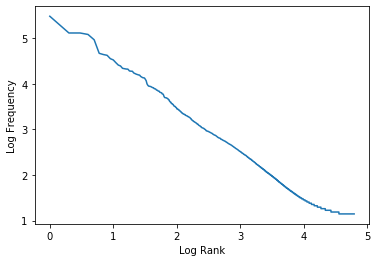

In [432]:
p = 10
e = 0.1
x = [math.log10(i) for i in range(1, len(sortfreq_corpus2)+1)]
y = [(1+e)*math.log10(i+p) for i in sortfreq_corpus2.values()]
plt.plot(x,y)
plt.xlabel('Log Rank')
plt.ylabel('Log Frequency')
plt.show()

# WORDCLOUD WITH KEYWORDS IN CORPUS

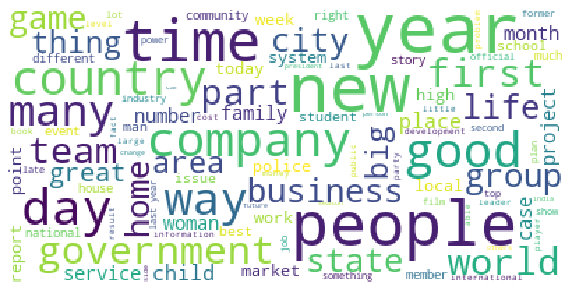

In [433]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(important))
print(wordcloud)
fig = plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# fig.savefig("word1.png", dpi=900)

# Significient yet ambiguous words 

In [434]:
ambigious_significient_word_list = []
for i in keywords.keys():
    synonyms = []
    for syn in wordnet.synsets(i):
        synonyms.append(syn.definition())
    if(len(synonyms) > 12):
        ambigious_significient_word_list.append(i)
    
print(ambigious_significient_word_list)
print(len(ambigious_significient_word_list))

['time', 'first', 'last', 'good', 'way', 'game', 'high', 'part', 'service', 'life', 'right', 'big', 'home', 'work', 'number', 'place', 'court', 'case', 'project', 'best', 'report', 'point', 'house', 'man', 'medium', 'second', 'issue', 'young', 'top', 'change', 'job', 'show', 'book', 'bank', 'end', 'level', 'small', 'side', 'name', 'low', 'board', 'bad', 'full', 'order', 'head', 'record', 'real', 'press', 'view', 'support', 'attack', 'post', 'free', 'line', 'study']
55


# Simplified Lesk Algorithm for Disambiguation

In [435]:
def simplified_lesk( word, sentence ):
    final = None
    maxoverlap = 0
    word=wordnet.morphy(word)


    for sense in wordnet.synsets(word):
        overlap = overlap_func(sense,sentence)
        for hyponyms in sense.hyponyms():
            overlap += overlap_func(hyponyms,sentence)

        if overlap > maxoverlap:
                maxoverlap = overlap
                final = sense
    return final

def overlap_func( synset, sentence ):
    x=synset.definition()
    gloss = set(word_tokenize(x))
    for example in synset.examples():
        gloss=gloss.union(example)

    sentence = set(sentence.split(" "))
    gloss=gloss.intersection(sentence)
    return len( gloss )



In [449]:
sentences = tokenize.sent_tokenize(corpus1)
for w in ambigious_significient_word_list[0:5]:
    df = {}
    count = 0
    for sentence in sentences:
        tokens = word_tokenize(sentence)
        if w in tokens:
            lesk = simplified_lesk(w,sentence)
            st = ('\n Definition: ')+(lesk.definition())
#             print(lesk.definition())
            df[lesk] = sentence+st
    print('Word: {}'.format(w))
    for key,value in df.items():
            print(key,' -> ',value)
            print('\n')

Word: time
Synset('time.n.05')  ->  We re in a situation now where we ( had nt ) won in a while , so any time you can score it makes it feel even better . "
 Definition: the continuum of experience in which events pass from the future through the present to the past


Synset('time.n.03')  ->  I think it s a great time to have an independent label .
 Definition: an indefinite period (usually marked by specific attributes or activities)


Word: first
Synset('first.n.01')  ->  The Rangers were called for two penalties after having been whistled for an NHLlow 78 penalty minutes in their first 13 games .
 Definition: the first or highest in an ordering or series


Synset('beginning.n.02')  ->  Henrik Lundqvist made a sprawling save on a shot in close by Horvat , but the puck stayed out at the right side as several players jabbed at it before Burrows knocked it in for his first of the season .  "
 Definition: the time at which something is supposed to begin


Synset('first_base.n.02')  ->  T